In [1]:
from neurotools.plotting.ref import SurfRef, VolRef
from neurotools.plotting import plot
import pandas as pd

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
rois = pd.read_csv('rois.csv', sep='\t')
rois

,Feature,masked
0,lh_cort.destrieux_g.and.s.cingul.ant,0.0
1,rh_cort.destrieux_g.and.s.cingul.ant,0.0
2,lh_cort.destrieux_g.and.s.cingul.mid.ant,0.0
3,rh_cort.destrieux_g.and.s.cingul.mid.ant,0.0
4,lh_cort.destrieux_g.and.s.cingul.mid.post,0.0
...,...,...
164,rh_subcort.aseg_putamen,0.0
165,lh_subcort.aseg_thalamus.proper,0.0
166,rh_subcort.aseg_thalamus.proper,0.0
167,lh_subcort.aseg_ventraldc,0.0


In [3]:
# Fill this dictionary with values to plot
to_plot = {}

# Initialize a surface reference that we will use
# to extract hemisphere plotting values, we must supply the name
# of the parcellation here.
surf_ref = SurfRef(space='fsaverage5', parc='destr')

# Key parameters here let the function know how to distinguish left and 
# right hemisphere rois, and also tells it to use use rois with str .destrieux_g.
to_plot['lh'], to_plot['rh'] =\
    surf_ref.get_hemis_plot_vals(rois, lh_key='lh_', rh_key='rh_', i_keys=['.destrieux_g.'])

# Similar to surface ref, we specify a volume reference, and extract the values needed
vol_ref = VolRef(space='mni_1mm', parc='aseg')
to_plot['sub'] = vol_ref.get_plot_vals(rois, i_keys=['.aseg_'])

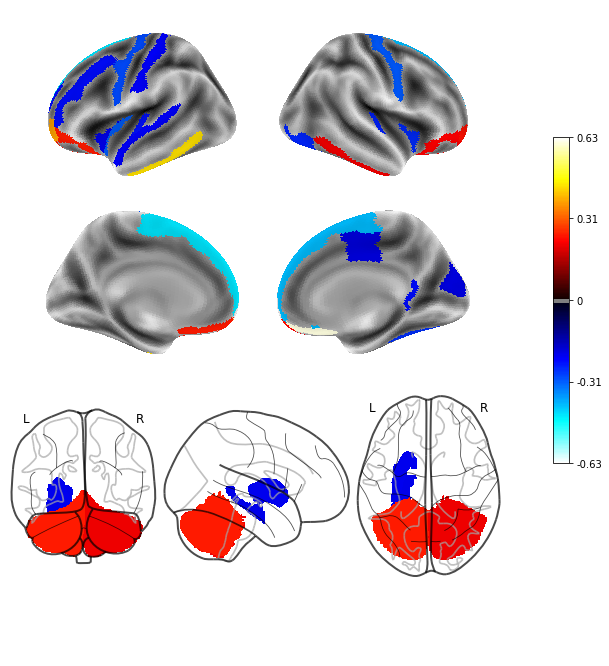

In [4]:
plot(to_plot, threshold=.01)